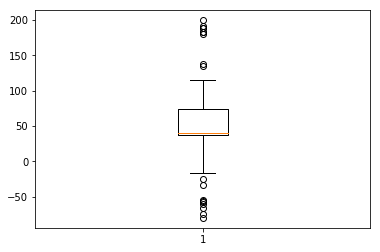

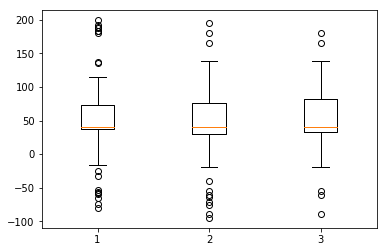

In [21]:
import matplotlib.pyplot as plt
import numpy as np



spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.boxplot(data)

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

In [23]:
spread

array([ 74.3332198 ,  61.11085412,  32.74488416,  37.88699773,
        50.45081299,  46.49328883,  78.22574021,  79.71652684,
        95.33343079,  38.65977225,  94.01564684,   9.91791206,
        87.43739753,  18.40388911,  66.25460942,  28.12144519,
        55.25621508,  45.50776225,   6.59656053,  79.40572471,
        96.71139443,  21.77476984,  45.37397505,  27.78820722,
        89.83016886,  71.84745512,  32.92808527,  45.70933742,
        80.12199623,  42.35418961,  44.89967188,  30.86848007,
        29.02483443,  63.61745954,  64.45725767,  93.07348711,
        48.41800984,  91.86974716,  10.21030816,  29.35101829,
        91.88832123,  93.17669953,   4.64396565,  68.119275  ,
         7.26989555,  42.4476414 ,  90.51765236,  11.85972747,
        19.63572542,   6.00124525])

In [1]:
! cd /home/vanniagm/drop/Dropbox/DataScience/Insight/InsightProject/

In [25]:
import pandas as pd
import numpy as np


df=pd.read_csv('data.csv')

aspectNF=(df[df['Popularity']=='NotFollowed'])['aspect_ratio']
aspectF=df[df['Popularity']=='Followed'].loc[:,['aspect_ratio']]
aspectP=df[df['Popularity']=='Popular'].loc[:,['aspect_ratio']]

hourNF=df[df['Popularity']=='NotFollowed'].loc[:,['note_countlog','hour']]
hourF=df[df['Popularity']=='Followed'].loc[:,['note_countlog','hour']]
hourP=df[df['Popularity']=='Popular'].loc[:,['note_countlog','hour']]

tagsNF=df[df['Popularity']=='NotFollowed'].loc[:,['note_countlog','tags']]
tagsF=df[df['Popularity']=='Followed'].loc[:,['note_countlog','tags']]
tagsP=df[df['Popularity']=='Popular'].loc[:,['note_countlog','tags']]




In [3]:
%%writefile plotfeat.py

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os


def make_plot(user_result,yvalue,filename,df,coldf):

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.subplots_adjust(left=0,right=1, top=0.8, bottom=0.1)
    plt.rcParams.update({'font.size': 21})

    userx=user_result
    userya=yvalue
    if userx=='NotFollowed':
        annx=0.9
    elif userx=='Followed':
        annx=1.98
    elif userx=='Popular':
        annx=2.9


    font = {'family': 'sans-serif',
                'color':  'black',
                'weight': 'normal',
                'size': 16,
                }
    pink0='#a50b5e'

    # multiple box plots on one figure
    fig, ax = plt.subplots()

    boxprops = dict(linewidth=2,color='white')
    medianprops = dict(linestyle='-', linewidth=3,color='white')
    df.boxplot(ax=ax,column=coldf, by='Popularity',boxprops=boxprops,
                    medianprops=medianprops)

    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xticklabels(['NotFollowed','Followed','Popular'],fontdict=font)


    el = Ellipse((2, -1), 0.5, 0.5)
    ax.add_patch(el)
    ann = ax.annotate('X',xy=(annx, userya),size=11, color='white',va="center",ha="left",
                              bbox=dict(boxstyle="round", fc=pink0, ec="k"),
                              arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                              fc=pink0, ec="k",
                                              patchA=None,
                                              patchB=el,
                                              relpos=(0, 0.5)))
    #ann = ax.annotate('User',xy=(annx, usery))

    fig.suptitle('')

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')


    plt.savefig(filename,transparent=True, box_inches='tight',dpi=800)
    plt.clf()
    
############################
def save_plot(user_result,yval,df,coldf,namefile):
    
    
    
    dir_path=os.getcwd()
    filename = dir_path+namefile #/blogpred_app/static/indicator.png'

    make_plot(user_result,yval,filename,df,coldf)

Overwriting plotfeat.py


In [5]:
import plotfeat
import pandas as pd

df=pd.read_csv('data.csv')
plotfeat.save_plot('Popular',.9,df,'aspect_ratio','/aspect.png')

In [2]:
import os 

os.getcwd()

'/home/vanniagm/drop/Dropbox/DataScience/Insight/InsightProject'

In [2]:
%%writefile plotfeat_hour.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os


def make_plot(userx,usery,filename,df):

    df=df.sample(frac=0.01, replace=False)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.subplots_adjust(left=0,right=1, top=0.8, bottom=0.1)
    plt.rcParams.update({'font.size': 21})

    font = {'family': 'sans-serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16,
                    }
    pink0='#a50b5e'

    x=df['hour'].reset_index(drop=True)
    y=df['note_countlog'].reset_index(drop=True)

    fig, ax = plt.subplots()
    ax.bar(x, y,  color=pink0)

    #plt.bar(x,y,color=pink0)
    #ax = plt.gca()
    ax.set_title('')
    ax.set_xlabel('Hour of the day',color='white')
    ax.set_ylabel('Note count (log10)',color='white')
    plt.yticks(np.arange(0, 3, .5))

    el = Ellipse((2, -1), 0.5, 0.5)
    ax.add_patch(el)
    ann = ax.annotate('X',xy=(userx, usery),size=14, color='black',va="center",ha="left",
                                  bbox=dict(boxstyle="round", fc='white', ec="k"),
                                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                                  fc='white', ec="k",
                                                  patchA=None,
                                                  patchB=el,
                                                  relpos=(0, 0.5)))

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')



    plt.savefig(filename,transparent=True, box_inches='tight',dpi=800)
    plt.clf()
    
############################
def save_plot(user_result,yval,df,namefile):
    
    
    
    dir_path=os.getcwd()
    filename = dir_path+namefile #/blogpred_app/static/indicator.png'

    make_plot(user_result,yval,filename,df)

Overwriting plotfeat_hour.py


In [1]:
import plotfeat_hour
import pandas as pd
import numpy as np

df=pd.read_csv('data.csv')
plotfeat_hour.save_plot(16,1.43,df,'/hour.png')

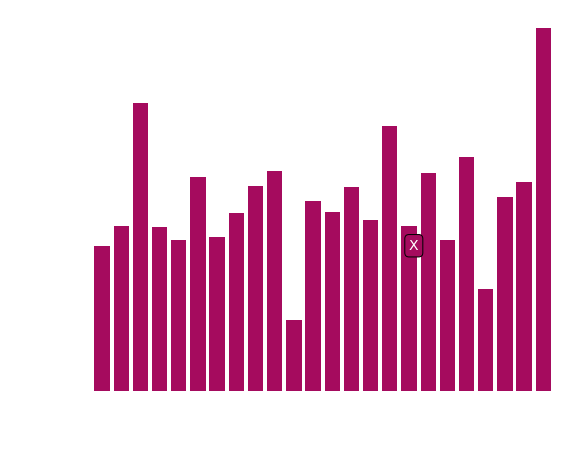

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

df=pd.read_csv('data.csv')
df=df.sample(frac=0.01, replace=False)

userx=16
usery=1.43

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.subplots_adjust(left=0,right=1, top=0.8, bottom=0.1)
plt.rcParams.update({'font.size': 21})

font = {'family': 'sans-serif',
                'color':  'black',
                'weight': 'normal',
                'size': 16,
                }
pink0='#a50b5e'

x=df['hour'].reset_index(drop=True)
y=df['note_countlog'].reset_index(drop=True)

fig, ax = plt.subplots()
ax.bar(x, y,  color=pink0)

#plt.bar(x,y,color=pink0)
#ax = plt.gca()
ax.set_title('')
ax.set_xlabel('Hour of the day',color='white')
ax.set_ylabel('Note count (log10)',color='white')
plt.yticks(np.arange(0, 3, .5))

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)
ann = ax.annotate('X',xy=(userx, usery),size=14, color='white',va="center",ha="left",
                              bbox=dict(boxstyle="round", fc=pink0, ec="k"),
                              arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                              fc=pink0, ec="k",
                                              patchA=None,
                                              patchB=el,
                                              relpos=(0, 0.5)))

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



plt.savefig('ex.png',transparent=True, box_inches='tight',dpi=800)
plt.show()

In [2]:
import math

math.log10(24)

1.380211241711606

In [12]:
%%writefile plotfeat_wcount.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os


def make_plot(userx,usery,filename,df):

    df=df.sample(frac=0.01, replace=False)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.subplots_adjust(left=0,right=1, top=0.8, bottom=0.1)
    plt.rcParams.update({'font.size': 21})

    font = {'family': 'sans-serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16,
                    }
    pink0='#a50b5e'

    x=df['wcount'].reset_index(drop=True)
    y=df['note_countlog'].reset_index(drop=True)

    fig, ax = plt.subplots()
    ax.scatter(x, y,  color=pink0)

    #plt.bar(x,y,color=pink0)
    #ax = plt.gca()
    ax.set_title('')
    ax.set_xlabel('Word counts',color='white')
    ax.set_ylabel('Note count (log10)',color='white')


    el = Ellipse((2, -1), 0.5, 0.5)
    ax.add_patch(el)
    ann = ax.annotate('X',xy=(userx, usery),size=14, color='white',va="center",ha="left",
                                  bbox=dict(boxstyle="round", fc=pink0, ec="k"),
                                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                                  fc=pink0, ec="k",
                                                  patchA=None,
                                                  patchB=el,
                                                  relpos=(0, 0.5)))

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')



    plt.savefig(filename,transparent=True, box_inches='tight',dpi=800)
    plt.clt()

    
###################3

def save_plot(user_result,yval,df,namefile):
    
    
    
    dir_path=os.getcwd()
    filename = dir_path+namefile #/blogpred_app/static/indicator.png'

    make_plot(user_result,yval,filename,df)



Overwriting plotfeat_wcount.py


In [2]:
import plotfeat_wcount
import pandas as pd
import numpy as np

df=pd.read_csv('data.csv')
plotfeat_wcount.save_plot(8,1.38,df,'/wcount.png')